<a href="https://colab.research.google.com/github/Kotarosz727/my_python/blob/main/%E5%A4%96%E3%82%8C%E5%80%A4%E9%99%A4%E5%8E%BB%EF%BC%8B%E3%82%B9%E3%82%B1%E3%83%BC%E3%83%AA%E3%83%B3%E3%82%B0%EF%BC%8B%E9%87%8D%E5%9B%9E%E5%B8%B0%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drive/MyDrive/kikagaku/housing.csv')
df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


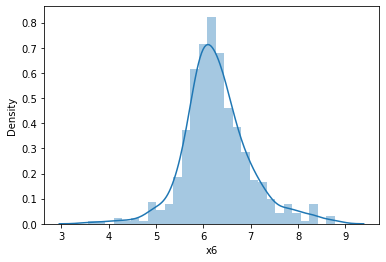

In [3]:
sns.distplot(df['x6'])

In [4]:
col = 'x6'

In [6]:
mean = df.mean()
mean

x1       3.613524
x2      11.363636
x3      11.136779
x4       0.069170
x5       0.554695
x6       6.284634
x7      68.574901
x8       3.795043
x9       9.549407
x10    408.237154
x11     18.455534
x12    356.674032
x13     12.653063
y       22.532806
dtype: float64

In [7]:
mean[col]

6.284634387351788

In [9]:
# 標準偏差　（standatd diviation）
sigma = df.std()
sigma

x1       8.601545
x2      23.322453
x3       6.860353
x4       0.253994
x5       0.115878
x6       0.702617
x7      28.148861
x8       2.105710
x9       8.707259
x10    168.537116
x11      2.164946
x12     91.294864
x13      7.141062
y        9.197104
dtype: float64

In [10]:
sigma[col]

0.7026171434153234

**Three-Sigma Limits**(外れ値除去)

In [12]:
low = mean[col] - 3 * sigma[col]
low

4.176782957105817

In [14]:
high = mean[col] + 3 * sigma[col]
high

8.392485817597759

In [19]:
# Three-Sigma Limits
df2 = df[(df[col] > low) & (df[col] < high)]

In [17]:
len(df)

506

In [20]:
len(df2)

498

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


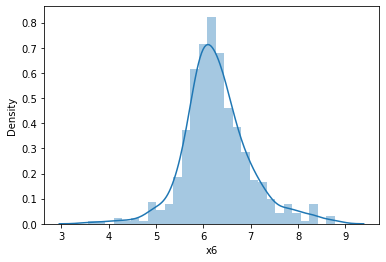

In [22]:
#分布の確認
sns.distplot(df[col])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


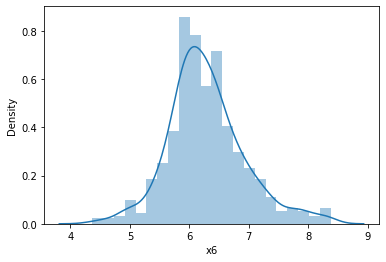

In [23]:
sns.distplot(df2[col])

**Three-Sigma Limits(外れ値除去)を全カラムに適用**

In [24]:
cols = df.columns
cols

Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'y'],
      dtype='object')

In [38]:
# temporary
_df = df

# 3σ法適用
for col in cols:
  # 3σ法の上限値適用
  low = mean[col] - 3*sigma[col]
  high = mean[col] + 3*sigma[col]

  _df = _df[(_df[col] > low) & (_df[col] < high)] 

In [30]:
len(df)

506

In [34]:
len(_df)

415

対処法（外れ値に対する）


*   外れ値は取り除く
*   外れ値を平均もしくは中央値などで埋める
*   主成分分析等を使って、潜在変数に変換した後に3σ法を適用(高度)





**入力変数と出力変数の切り分け**

In [41]:
_df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [46]:
# 3σ法を適用したデータを使う
X = _df.iloc[:, :-1]
X

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [47]:
y = _df.iloc[:, -1]
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: y, Length: 415, dtype: float64

**訓練データと検証データに分割**

In [44]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

**重回帰分析**

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
model = LinearRegression()

In [52]:
model.fit(X_train, y_train)

LinearRegression()

In [53]:
model.score(X_train, y_train)

0.7972109224535133

In [54]:
model.score(X_test, y_test)

0.6253776004329593

過学習(overfitting)になってしまう

**スケーリング**

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
scaler = StandardScaler()

In [57]:
scaler.fit(X_train)

StandardScaler()

In [61]:
# scalling
X_train2 = scaler.transform(X_train)
X_test2 = scaler.transform(X_test)

In [59]:
model = LinearRegression()

In [62]:
model.fit(X_train2, y_train)

LinearRegression()

In [63]:
model.score(X_train2, y_train)

0.7972109224535133

In [64]:
model.score(X_test2, y_test)

0.6253776004329598

In [76]:
# 重みの確認
model.coef_

array([-0.2 ,  0.21,  0.51,  0.  , -1.21,  3.92, -0.37, -1.86,  1.17,
       -1.53, -1.87,  0.24, -2.76])

In [75]:
np.set_printoptions(precision=2, suppress=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


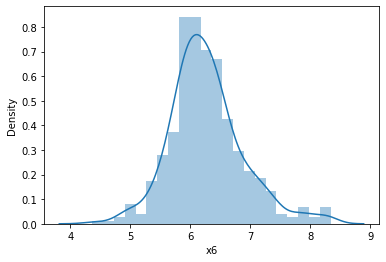

In [77]:
sns.distplot(_df['x6'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


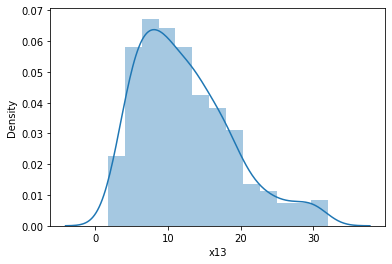

In [78]:
sns.distplot(_df['x13'])